<a href="https://colab.research.google.com/github/pleunipennings/CSC508_ML_Biomedicine_Class/blob/main/Module4/Module_4a_PatData_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis of PatData ADNI dataset

Now let’s get started with the actual analysis with the csv file you created in the notebook before this one!

We will be making some plots using the [plotnine library](https://plotnine.readthedocs.io/en/stable/gallery.html). The plotnine library that is based on ggplot2 used when programming in R.

Here is a guide on 'Data Analysis and Visualization in Python for Ecologists' using this plotnine. Guide: https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html

Here is a nice guide on Exploratory data analysis and Python plotting libraries. You can click through to compare how certain plots would look depending on the library (Different libraries: pandas, plotnine, plotly, and Altair) https://pythonplot.com/



# Loading the data and Importing packages


In [2]:
# importing packages for exploratory analysis
import pandas as pd
import warnings
from pandas.api.types import CategoricalDtype
import numpy as np
from plotnine import *

Read the dataset "PatData.csv" from GitHub.


In [3]:
# Reading and taking a peak of the data
url = "https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/PatData.csv"
Pat_data = pd.read_csv(url)
Pat_data.head()

,PTID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,DX,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,002_S_0295,84.8,Male,18,Not Hisp/Latino,White,Married,1.0,NL,43332.500000,6805.125000,1.071568e+06,3752.625000,17693.875000,19420.125000,1.649602e+06
1,002_S_0413,76.3,Female,16,Not Hisp/Latino,White,Married,0.0,NL,31936.454545,6824.636364,1.055413e+06,4131.090909,20095.909091,20235.545455,1.600009e+06
2,002_S_0559,79.3,Male,16,Not Hisp/Latino,White,Widowed,1.0,NL,38410.666667,7496.666667,1.092807e+06,3998.333333,18993.000000,22226.000000,1.703968e+06
3,002_S_0619,77.5,Male,12,Not Hisp/Latino,White,Married,2.0,Dementia,120529.500000,5812.000000,1.093932e+06,2773.000000,20675.000000,19959.000000,2.070530e+06
4,002_S_0685,89.6,Female,16,Not Hisp/Latino,White,Married,0.0,NL,40921.571429,7063.250000,9.800458e+05,3894.375000,14152.250000,18133.625000,1.521331e+06


# Looking at a single variable

## Discrete variables vs Continuous variables
Here is a short read on how you can tell the difference between discrete and continuos variables. We will also be discussing it in the next few steps with examples. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/

## Discrete variables
What is a discrete variable?

A **discrete variable** is a variable whose value is  countable in a finite amount of time. For example, you can count the change in your pocket or the number of students present in your class. **Barplots** are a useful graphical representation for discrete data.

In our dataset, the 'Diagnosis' column is an example of a discrete variable because you can count the number of patients who may not be diagnosed with Dementia or those who may have a Mild Cognitive Impairment.

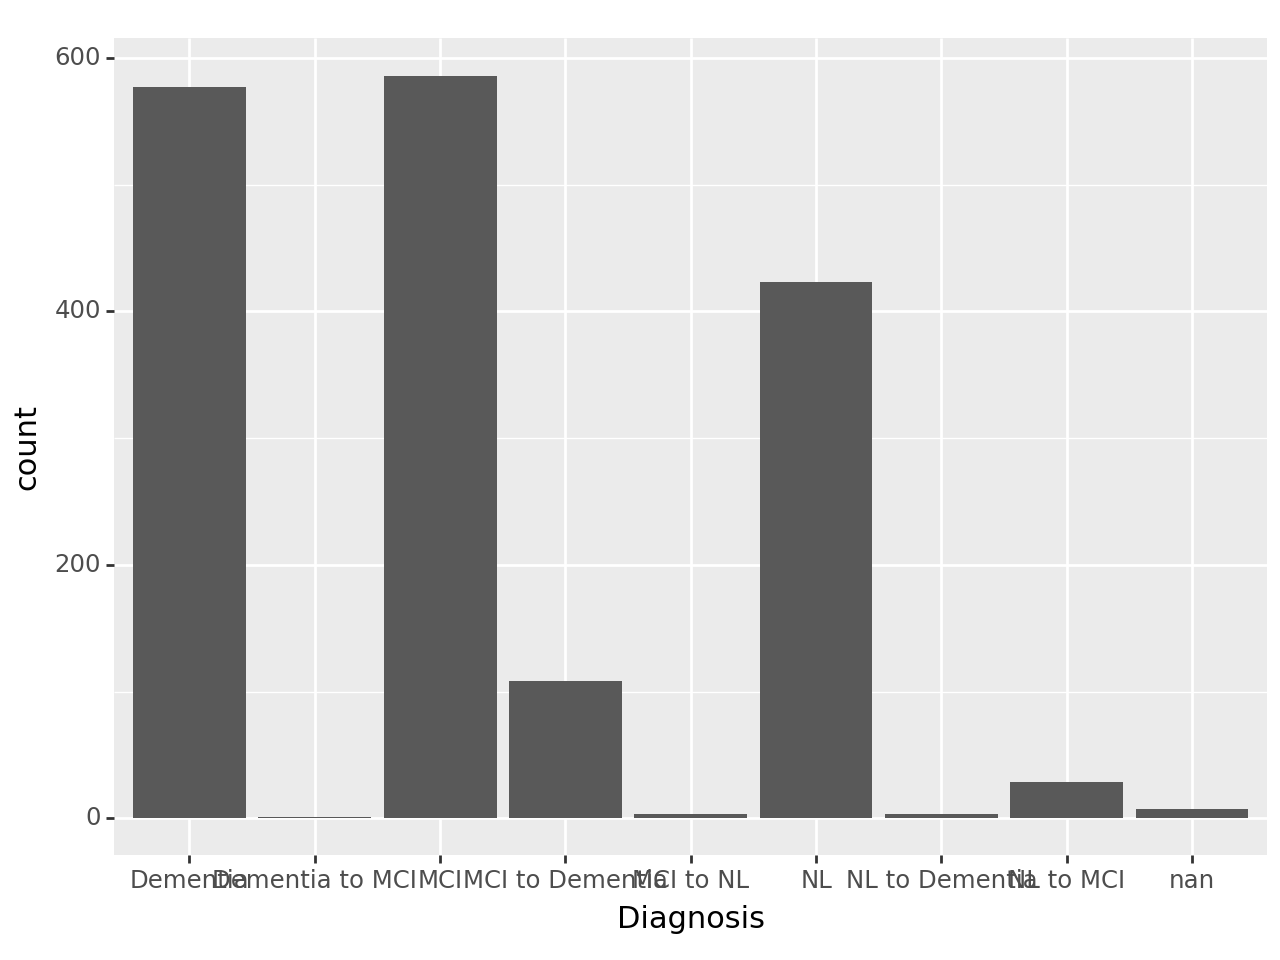

<Figure Size: (640 x 480)>

In [4]:
# Making a Barplot
(ggplot(data=Pat_data) +
 aes(x='DX') +
 geom_bar() +
 labs(x = "Diagnosis")
 )

Initially, the x-axis is hard to read, so let’s change that by adding an argument that rotates the text.


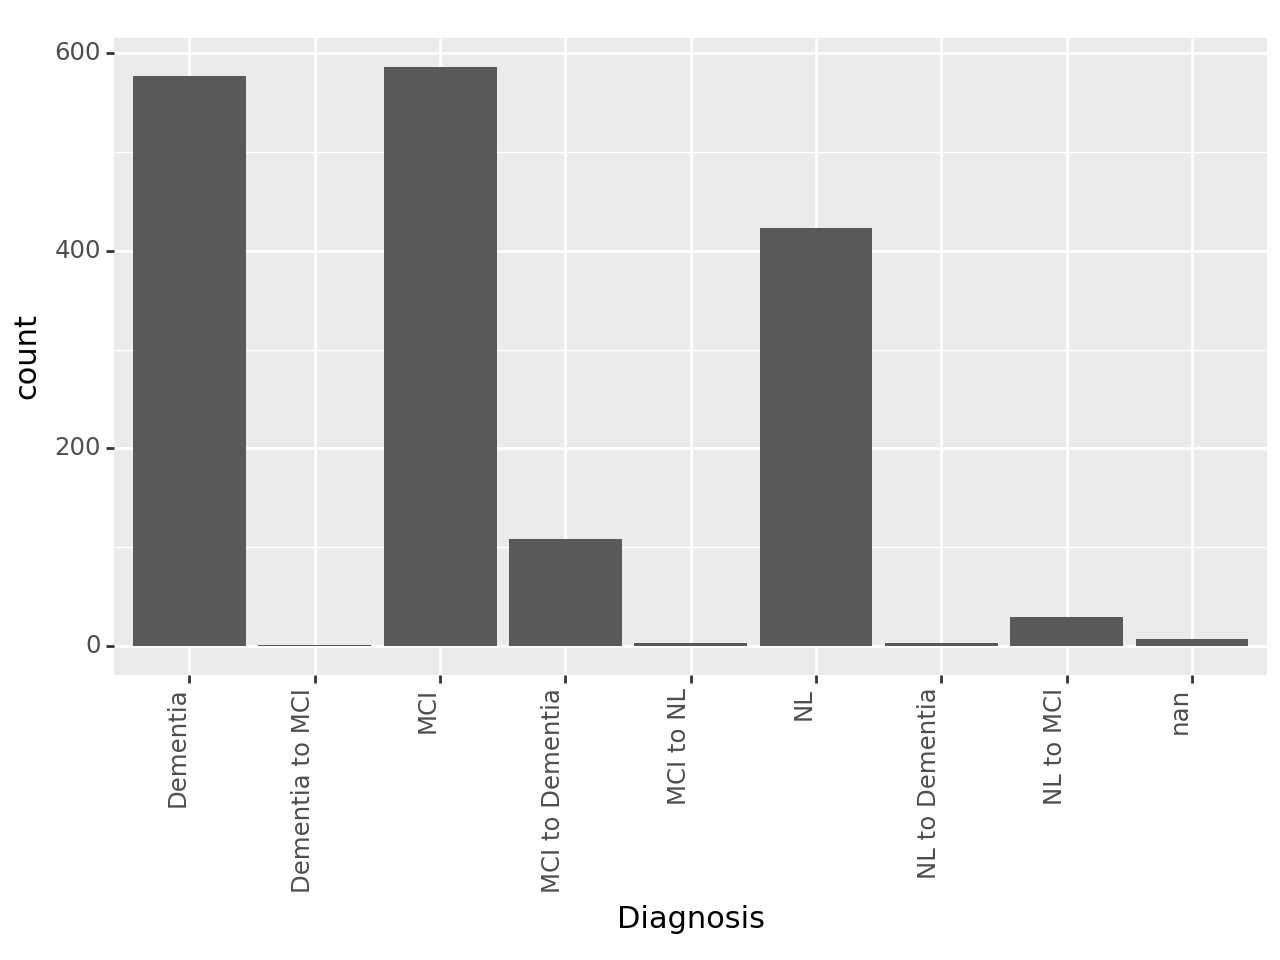

<Figure Size: (640 x 480)>

In [5]:
# Correcting x labels for barplot
(ggplot(data=Pat_data) +
 aes(x='DX') +
 geom_bar() +
 labs(x = "Diagnosis") +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

## Task 1: Barplots

Which other variables could you plot in a barplot? Create a few plots!
Take a screenshot of one or more plots to include in the file for iLearn.
One common concern for research studies in the US is that most participants are white. You could use a barplot to look at the PTRACCAT variable.


In [6]:
# Create a barplot below using code for a variable of your choice and for the variable PTRACCAT!

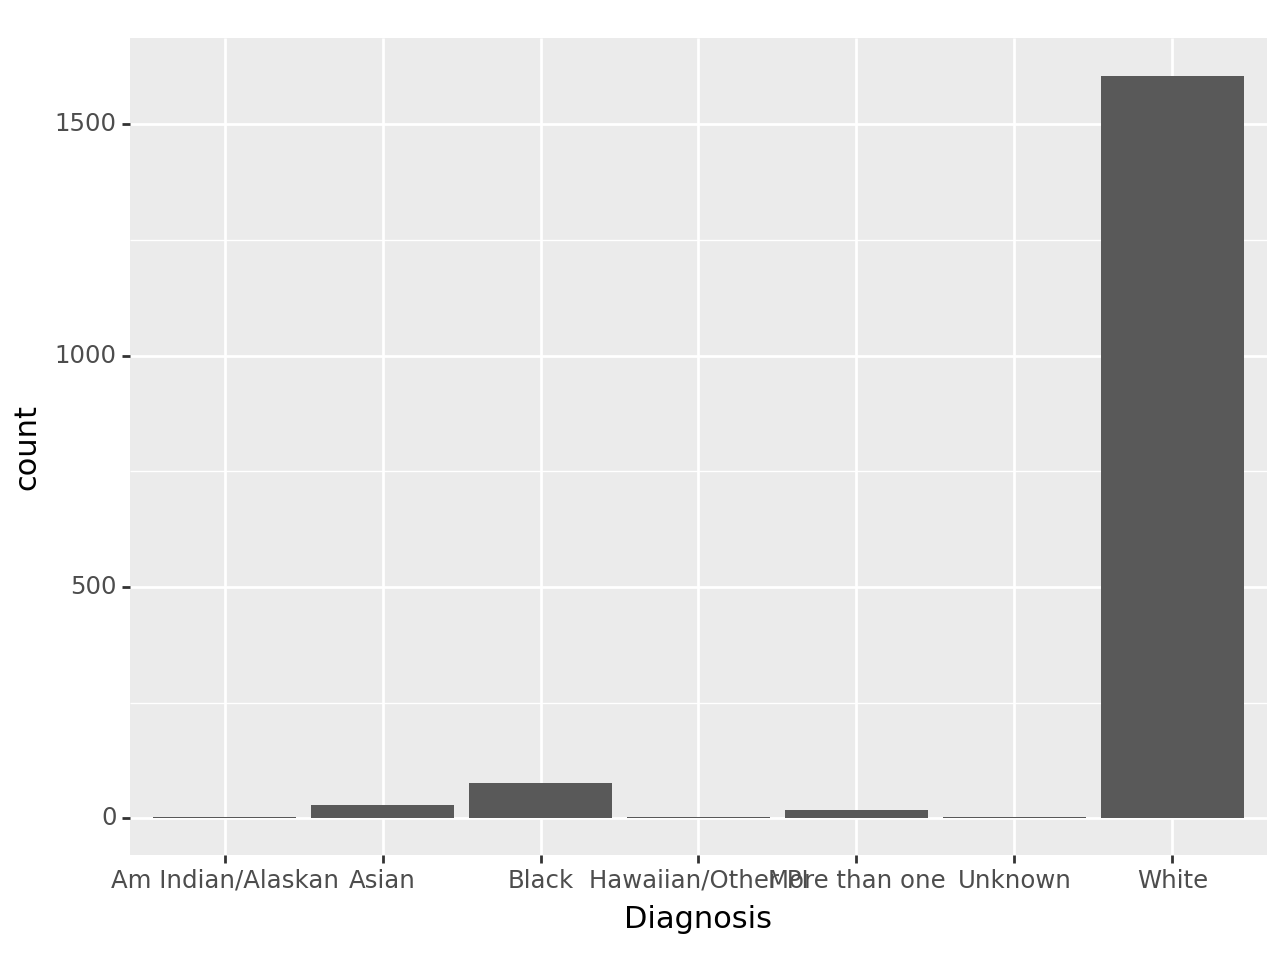

<Figure Size: (640 x 480)>

In [7]:
# Making a Barplot
(ggplot(data=Pat_data) +
 aes(x='PTRACCAT') +
 geom_bar() +
 labs(x = "Diagnosis")
 )

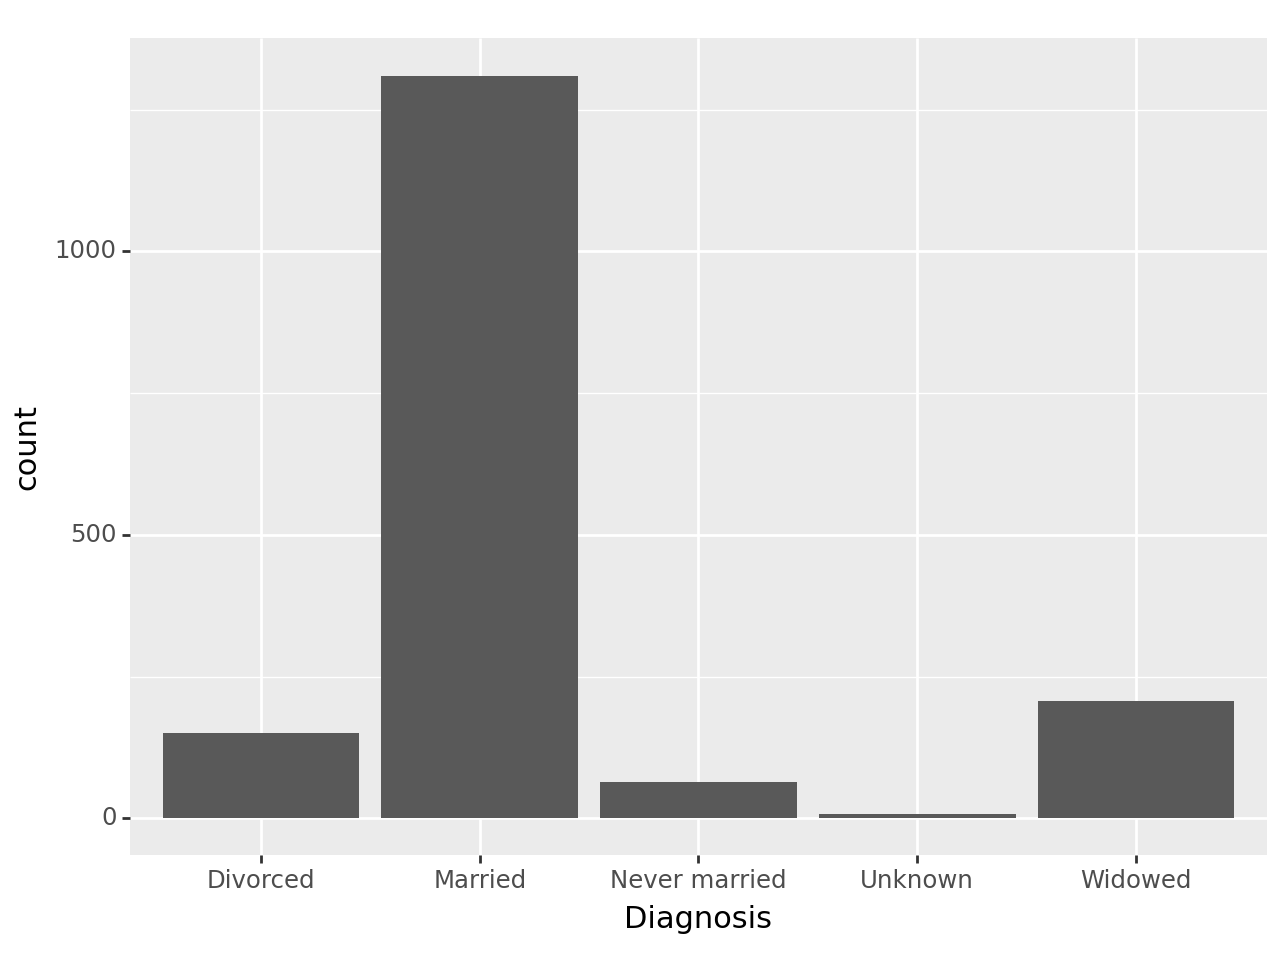

<Figure Size: (640 x 480)>

In [8]:
# Making a Barplot
(ggplot(data=Pat_data) +
 aes(x='PTMARRY') +
 geom_bar() +
 labs(x = "Diagnosis")
 )

## Continuous variables

What is a continuous variable?

A **continuous variable** is a variable whose value is  measured which can take any value. For example, time is a continuous variable that keeps going on forever. Other examples of a continuous variable are distance, age and temperature. **Area Plots** are more useful for Continuous variables, since it can represent data that contains decimal points.

In our dataset, the 'AGE' column is an example of a continuous variable. There is a decimal point in the age to try to capture not just the years but also months.

When you're using data visualizations like area plots or histograms, you'll need to specify bins. Area plots and histograms display numerical data by grouping data into "bins" of equal width. We will show you some examples and how to change the size.

In the area plot for AGE, we have only specified the 'x-axis' in the aesthetic mapping function `aes()`. So we need to add the argument `stat='bin'` in the `geom_area()` or `geom_histogram()` function we because didn't specify a column for 'y' in the data. By setting `stat='bin'` (a default setting), it will count the data.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 23'. Pick better value with 'binwidth'.


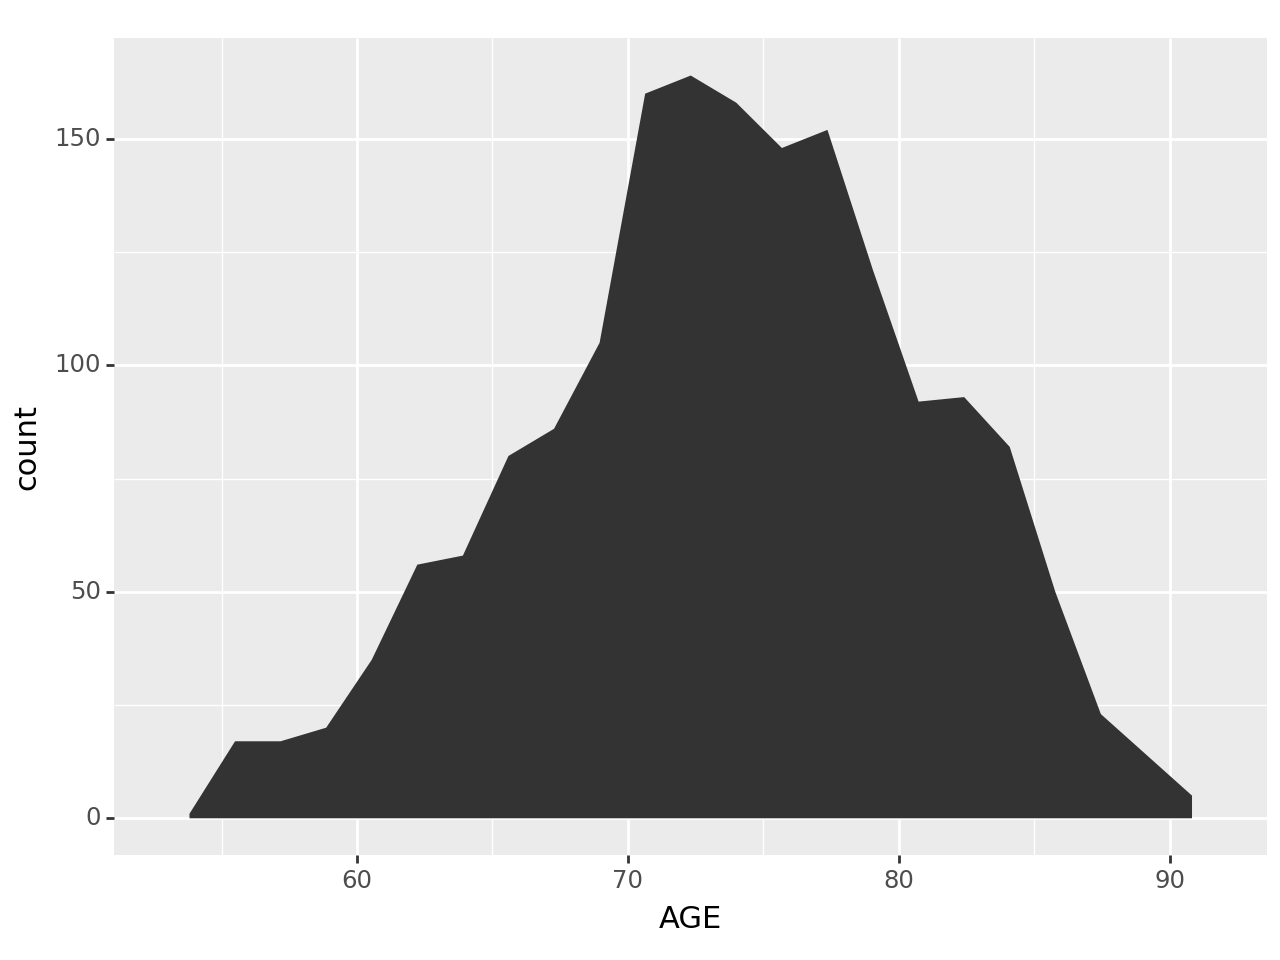

<Figure Size: (640 x 480)>

In [9]:
# displaying a density plot or area plot
(ggplot(data=Pat_data) +
 aes(x='AGE') +
 geom_area(stat='bin')
 )

# Discrete or Continuous?

We can deal with continuous variables by turning it into a discrete variable. For instance, age could be turned into a discrete variable such as how many years old you are. You can say you are 25 years old instead of 25 years, 10 months, 2 days, 5 hours, 4 seconds, 4 milliseconds, 8 nanoseconds, 99 picoseconds…and so on. On the other hand you can also sometimes turn categorical variables into continous ones as well. For example for Diagnosis, we could have measured the amount of Cognitive Impairment in terms of points of an exam that evaluates impairment rather than a specific category. Variables can be either depending on how you conceive them!

Here for example, we are plotting the patient's education level. In this column, 12 years will generally refer to high school, 16 years will be college, etc. We could have conceived it as continuous, or categorically as finished high school, finished college or finished advanced degree.

Something different in this plot is that we have added the argument "`binwidth = 1`". As we mentioned earlier, in these types of plots, it groups data into "bins" and we are now giving the bins a size/width. In this example, the binwidth is 1, so it's giving a count for education years 10-11, 11-12, 12-13, etc. If you change the size to 3, the count would be for years 10-13 and 13-16. You would see a change in how the graph looks.

Here is a short read to under stand more about histograms, bins, and binwidth.
https://www.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/a/histograms-review

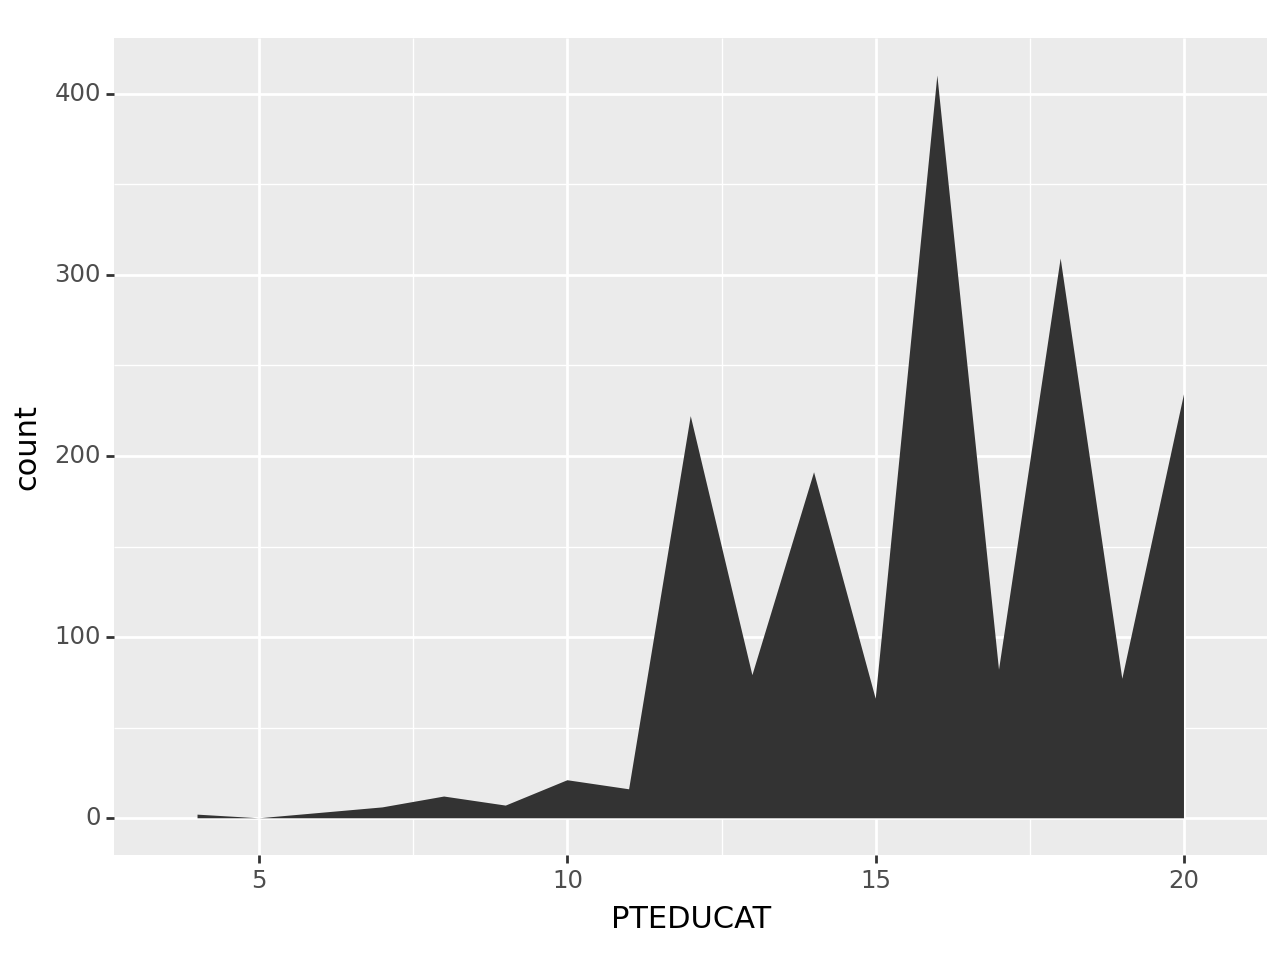

<Figure Size: (640 x 480)>

In [10]:
# Displaying as density plot or area plot
(ggplot(data=Pat_data) +
 aes(x='PTEDUCAT') +
 geom_area(stat = "bin", binwidth = 1)
 )

In this graph, we are using the `geom_histogram()` function and specifying the number of bins.

We specified that in this histogram, we want to see the data divided into 10 bins. If you count the number of rectangles/bars, you'll see that there are 10 bins.

If the max education option is 20 years and we divided the data into 10 bins, that means it's taking a count for every 2 years.

You can also choose to use `geom_histogram(stat='bin')` like we did for the `geom_area()` plots but it may give you a warning that it's using default setting and that you should "*Pick better value with 'binwidth'*"

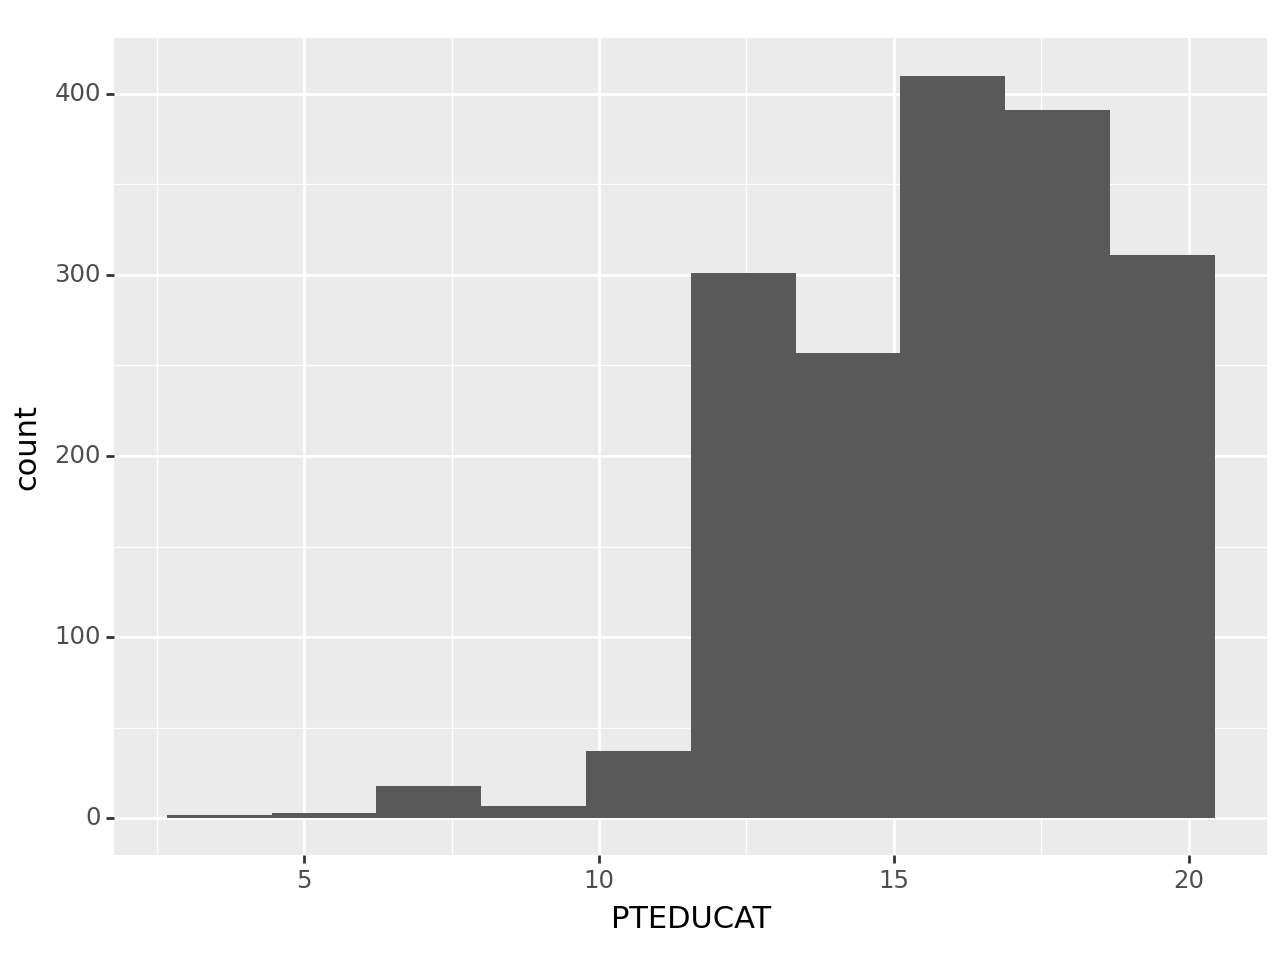

<Figure Size: (640 x 480)>

In [11]:
# diplaying it as bars stacked together similar to barplot but all stuck together
(ggplot(data=Pat_data) +
 aes(x='PTEDUCAT') +
 geom_histogram(bins=10)
 )

## Task 2: Plotting  brain volume variables

Have a look at a few of the brain volume variables (i.e. 'WholeBrain' = whole brain volume or 'ICV' = intracranial volume). What is the most common intracranial volume in the dataset?


# Looking at two variables
We have been making plots with one variable at a time. Now let's plot two variables!

## Two continuous variables
When we are interested in two continuous variables, we can make a scatter plot.

Here's a difference to our single variables, we are now specifiying both an 'x' and a 'y' value in the aesthetics mapping function, `aes()`. With geom_smooth() I add a trendline to the figure.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


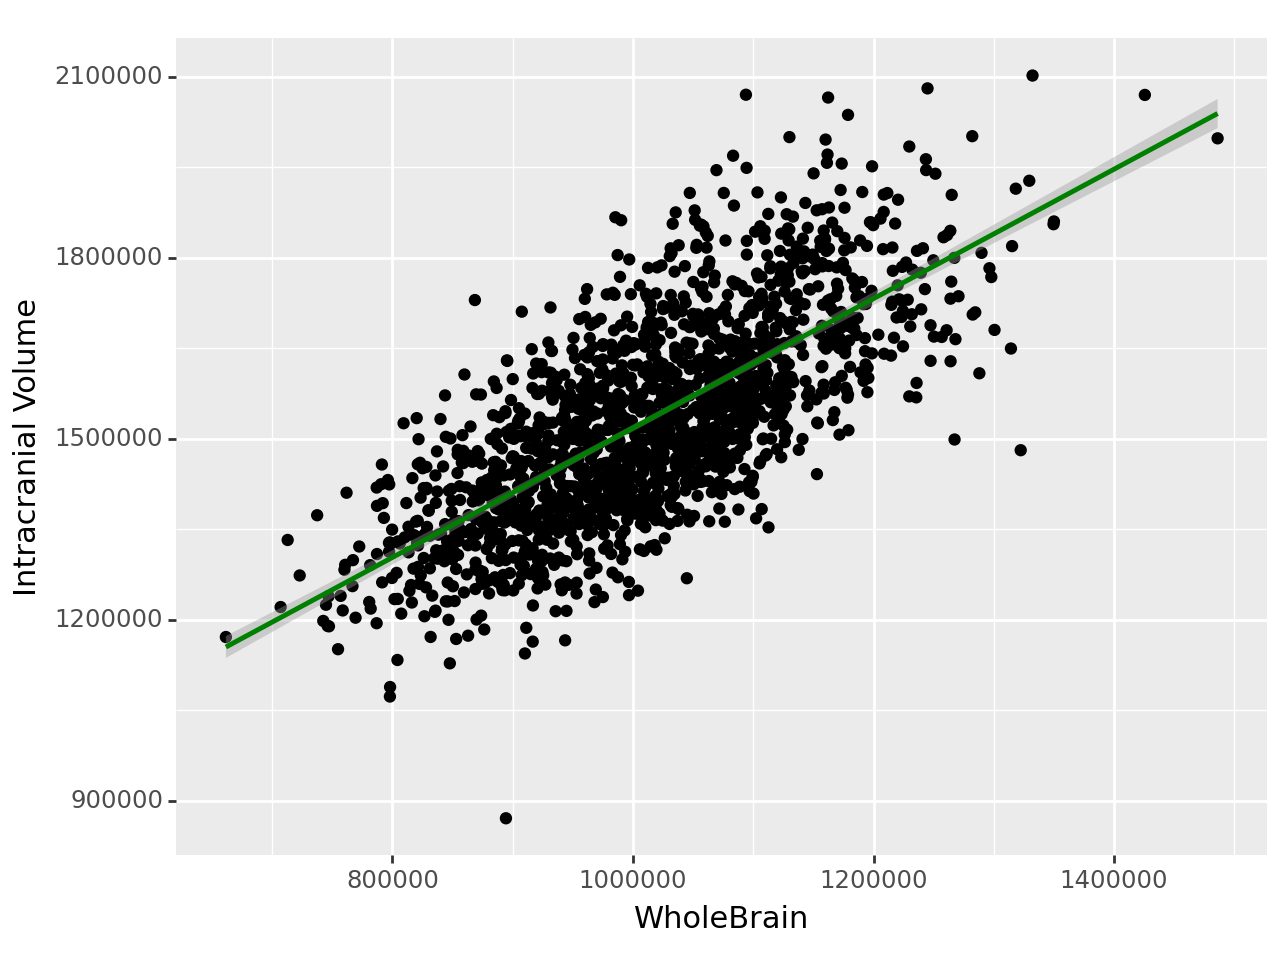

<Figure Size: (640 x 480)>

In [12]:
# Displaying Scatterplot with 2 variables (Wholebrain, Intracranial Volume)
(ggplot(data=Pat_data) +
 aes(x='WholeBrain', y='ICV') +
 geom_point() +
 geom_smooth(method = 'lm', colour="green")+
  labs(y = "Intracranial Volume")
 )

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


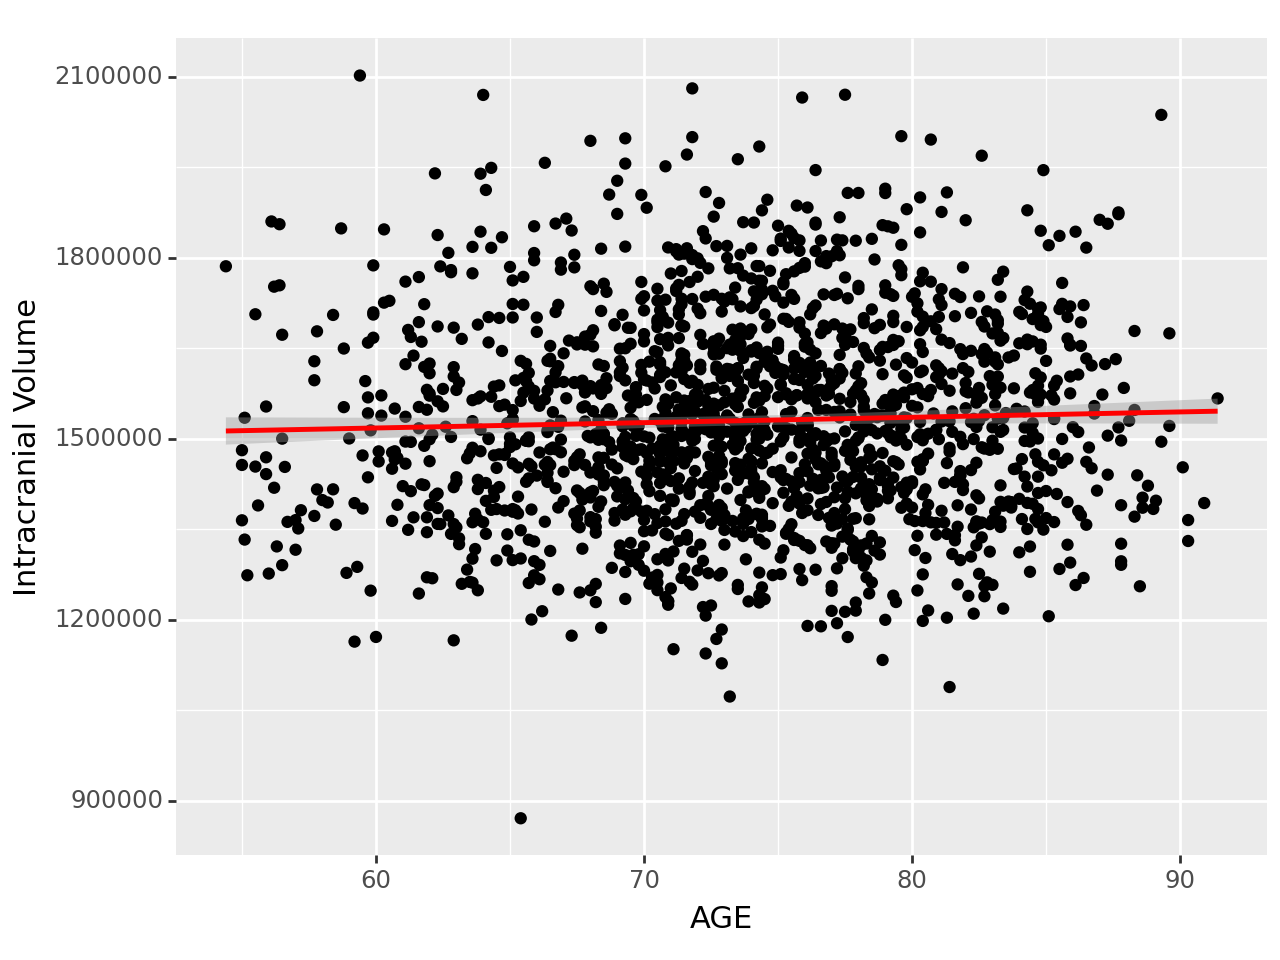

<Figure Size: (640 x 480)>

In [13]:
# Displaying Scatterplot with 2 variables
(ggplot(data=Pat_data) +
 aes(x='AGE', y='ICV') +
 geom_point() +
 geom_smooth(method = 'lm', colour="red")+
  labs(y = "Intracranial Volume")
 )

In this chunk of code, we create a linear model by adding `method = 'lm'`.

This fits a line even if there is not much evidence that the line is meaningful. In this case, the line goes up slightly. This suggests that brains grow as we get older. However, it is likely that the slope of the line is not significantly different from 0.




## Task 3: Plotting two variables!

Plot the volumes of the different parts of the brain against each other. For example Ventricles vs Hippocampus or Midterm vs Fusiform. Which brain parts are most strongly correlated with each other (just from eye-balling the plots?).

[Correlation coefficients](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/) are used to measure how strong a relationship is between two variables. There are several types of correlation coefficient such as Pearson, Kendall, and Spearman (the most common used is Pearson’s).


![pearson-2-small.png](https://drive.google.com/uc?export=view&id=1u-ANH6bqw7u0Xqvv49pu9wp_zgOCuQ-5)

(image from https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)

The formulas return a value between -1 and 1, where:
*   1 indicates a strong positive relationship
*   -1 indicates a strong negative relationship
*   0 indicates no relationship at all

If you want to quantify the correlation with every column in the dataframe, you can use the `corr()` function. Notice that the main diagonal is full of 1.00. This makes sense because a correlation of a variable with itself is perfect.

In [14]:
# Getting Correlation matrix
Pat_data.corr(method ='pearson')

<ipython-input-14-4edec82c3fb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,AGE,PTEDUCAT,APOE4,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
AGE,1.000000,-0.068122,-0.137934,0.339080,-0.379099,-0.288238,-0.217470,-0.241140,-0.206937,0.038151
PTEDUCAT,-0.068122,1.000000,-0.058182,0.035313,0.146768,0.195797,0.183512,0.189312,0.171249,0.169275
APOE4,-0.137934,-0.058182,1.000000,0.024013,-0.229132,-0.048561,-0.217133,-0.116100,-0.133417,-0.000368
Ventricles,0.339080,0.035313,0.024013,1.000000,-0.293128,0.073160,-0.171735,-0.110707,-0.047367,0.541483
Hippocampus,-0.379099,0.146768,-0.229132,-0.293128,1.000000,0.594302,0.723991,0.553032,0.618786,0.202917
WholeBrain,-0.288238,0.195797,-0.048561,0.073160,0.594302,1.000000,0.526872,0.725960,0.752452,0.715922
Entorhinal,-0.217470,0.183512,-0.217133,-0.171735,0.723991,0.526872,1.000000,0.573912,0.547388,0.224116
Fusiform,-0.241140,0.189312,-0.116100,-0.110707,0.553032,0.725960,0.573912,1.000000,0.705563,0.377859
MidTemp,-0.206937,0.171249,-0.133417,-0.047367,0.618786,0.752452,0.547388,0.705563,1.000000,0.433033
ICV,0.038151,0.169275,-0.000368,0.541483,0.202917,0.715922,0.224116,0.377859,0.433033,1.000000


If you want to quantify the correlation between two continuous variables, you can use the `corr()` function and specify the two columns like this.

In [15]:
# Checking the correlation between 2 specific variables
Pat_data['Ventricles'].corr(Pat_data['Hippocampus'], method ='pearson')

-0.2931278080332342

## One discrete, one continuous variable
For this data, we're going to use a few different plot types you may not have used before!

When we are interested in a continuous and a discrete variable, we can make a box-plot or a violin plot. These plots show the range of values of the continuous variable for each category of the discrete variable. **Boxplots** are informative and allow you to quickly check their medians, quantiles, variances and even outlier observations within each group, in other words it gives you and overview of what possible differences lie for each category.



/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


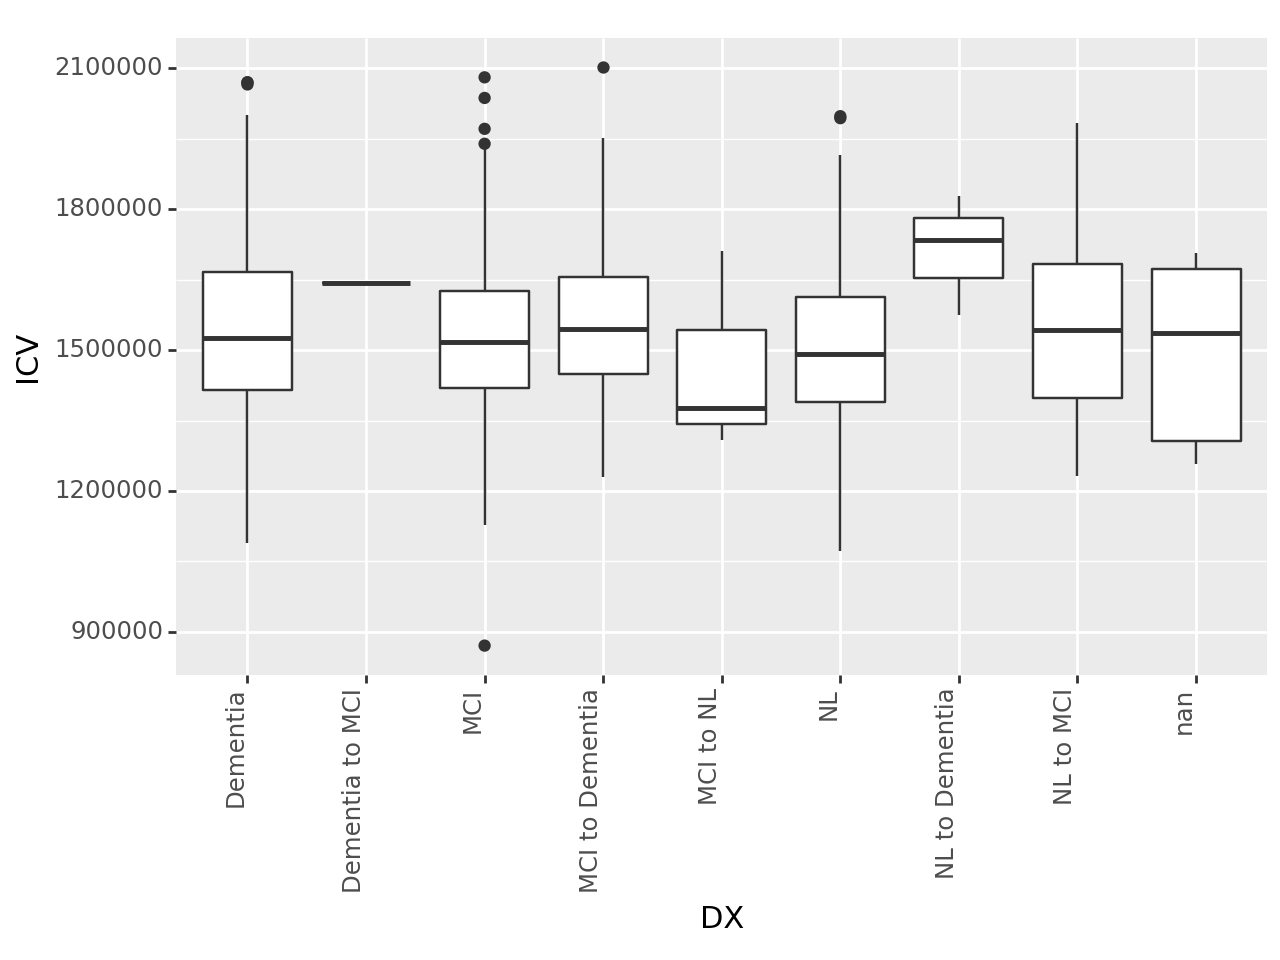

<Figure Size: (640 x 480)>

In [16]:
# Creating a boxplot for ICV and Diagnosis
(ggplot(data=Pat_data) +
 aes(x='DX', y='ICV') +
 geom_boxplot() +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

Another interesting plot to look at is the **Violin plot**, this elegant looking plot is read by partitioning each violin into half, this essentially shows you the distribution of that particular categorical variable. A nice thing about the violin plot is that it shows the information of all the data not just the quartiles and medians.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:164: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:169: PlotnineWarning: Groups with fewer than 2 data points have been removed.


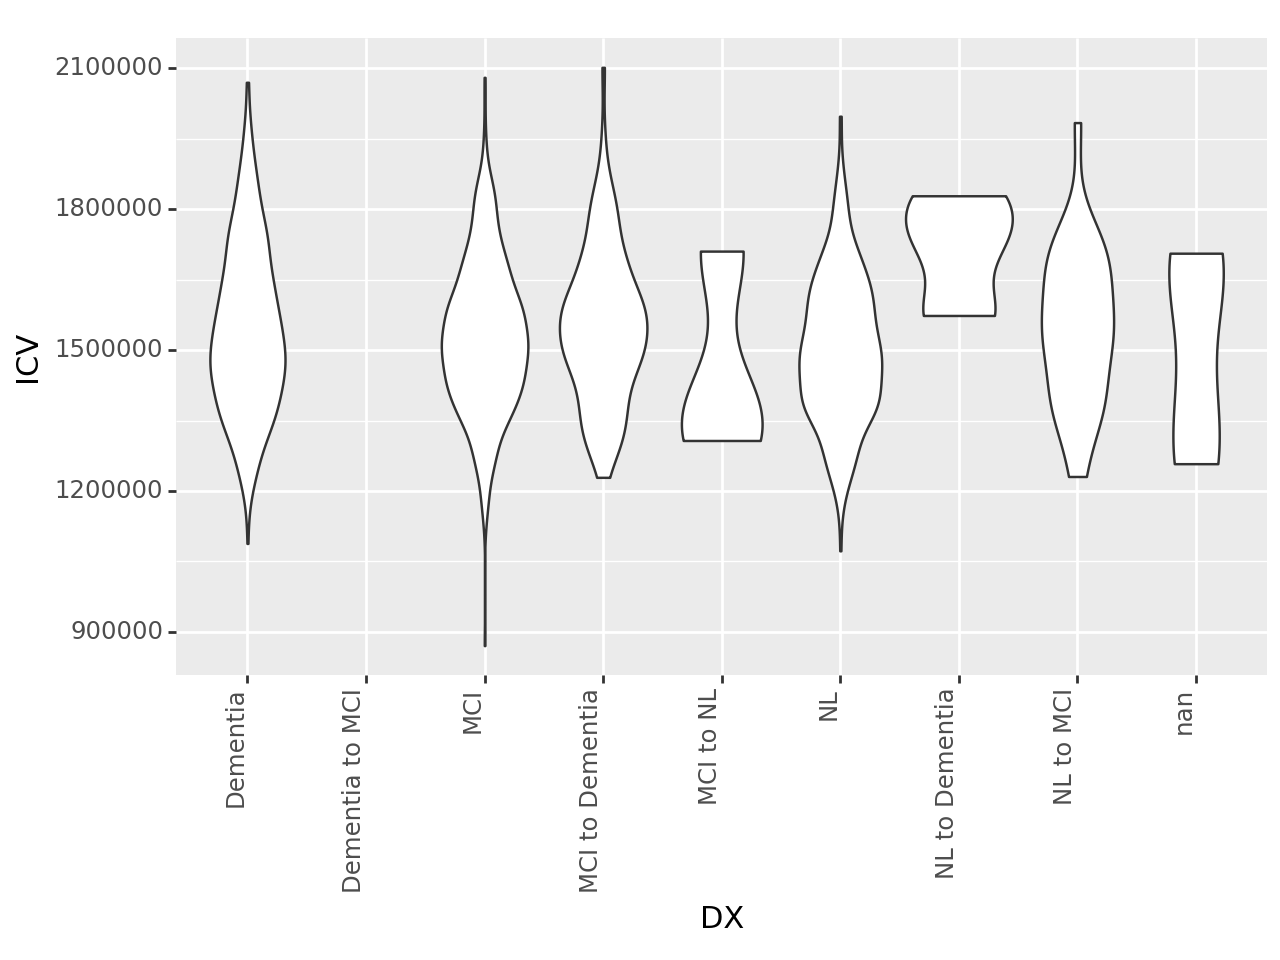

<Figure Size: (640 x 480)>

In [17]:
# Creating violin plots for ICV and Diagnosis
(ggplot(data=Pat_data) +
 aes(x='DX', y='ICV') +
 geom_violin() +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

Yet a third plot that looks similar to the violin plot is the **Dotplot**. The dot plot shows us a similar graph than the violin plot except we can actually see each data point, values that are recurrent show us the wider parts of the violin plot.

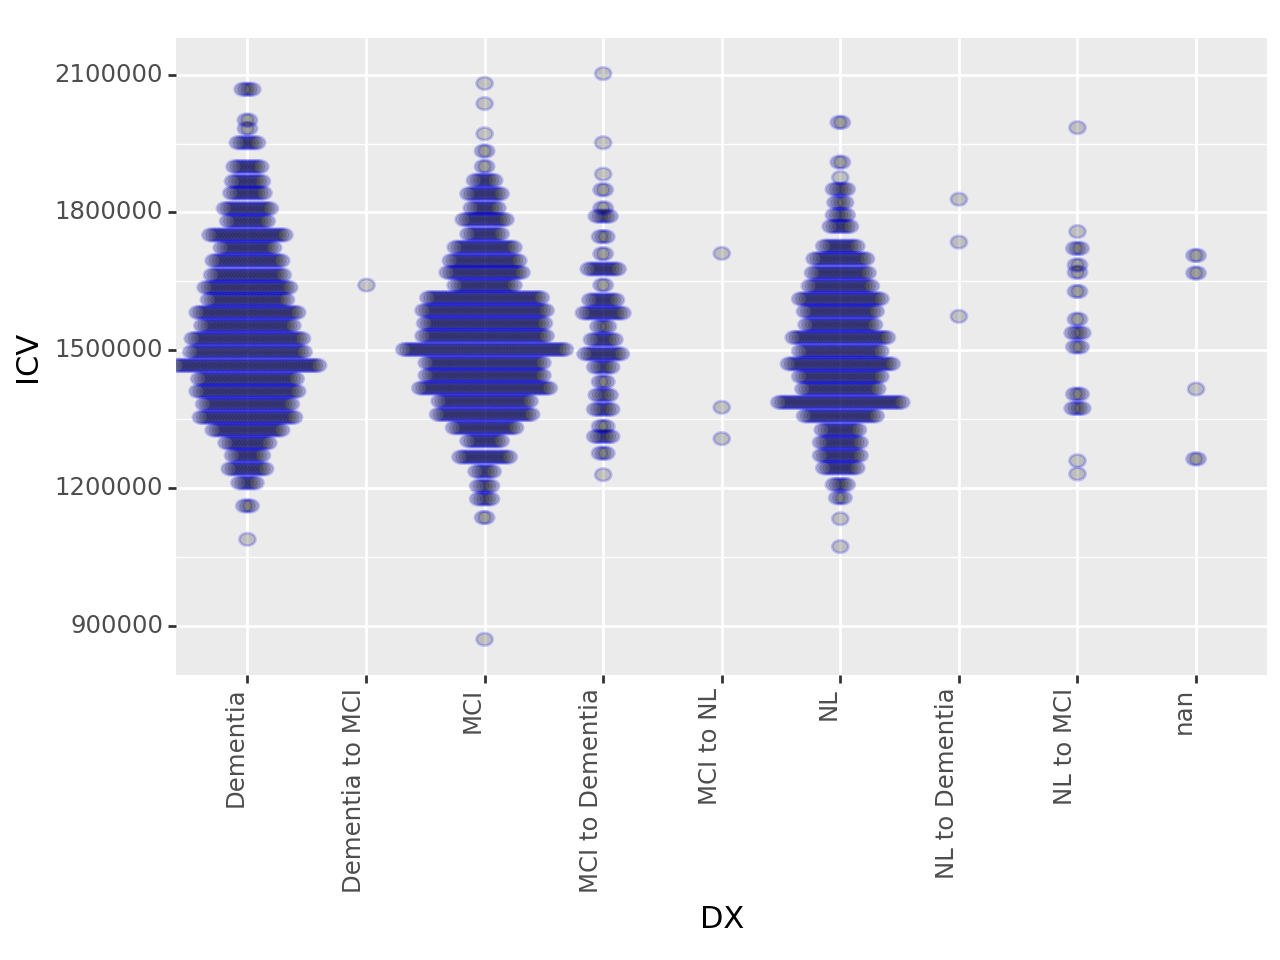

<Figure Size: (640 x 480)>

In [18]:
# The dotplot for ICV and Diagnosis
(ggplot(data=Pat_data) +
 aes(x='DX', y='ICV') +
 geom_dotplot(binaxis = 'y',
               stackdir = 'center',
               alpha = 0.2,
               stackratio = 0.2,
               color='blue',
               bins = 45) +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

## Focus on main three DX categories

Lets simplify the data by only keeping the 3 main DX groups. Notice that you can make all sorts of customizations to these plots, such as color of the data points, their size, etc.


In [19]:
# Dropping all intermediate diagnosis
D2 = Pat_data[Pat_data.DX.isin(["Dementia", "MCI", "NL"])]
PD2 = D2.dropna()

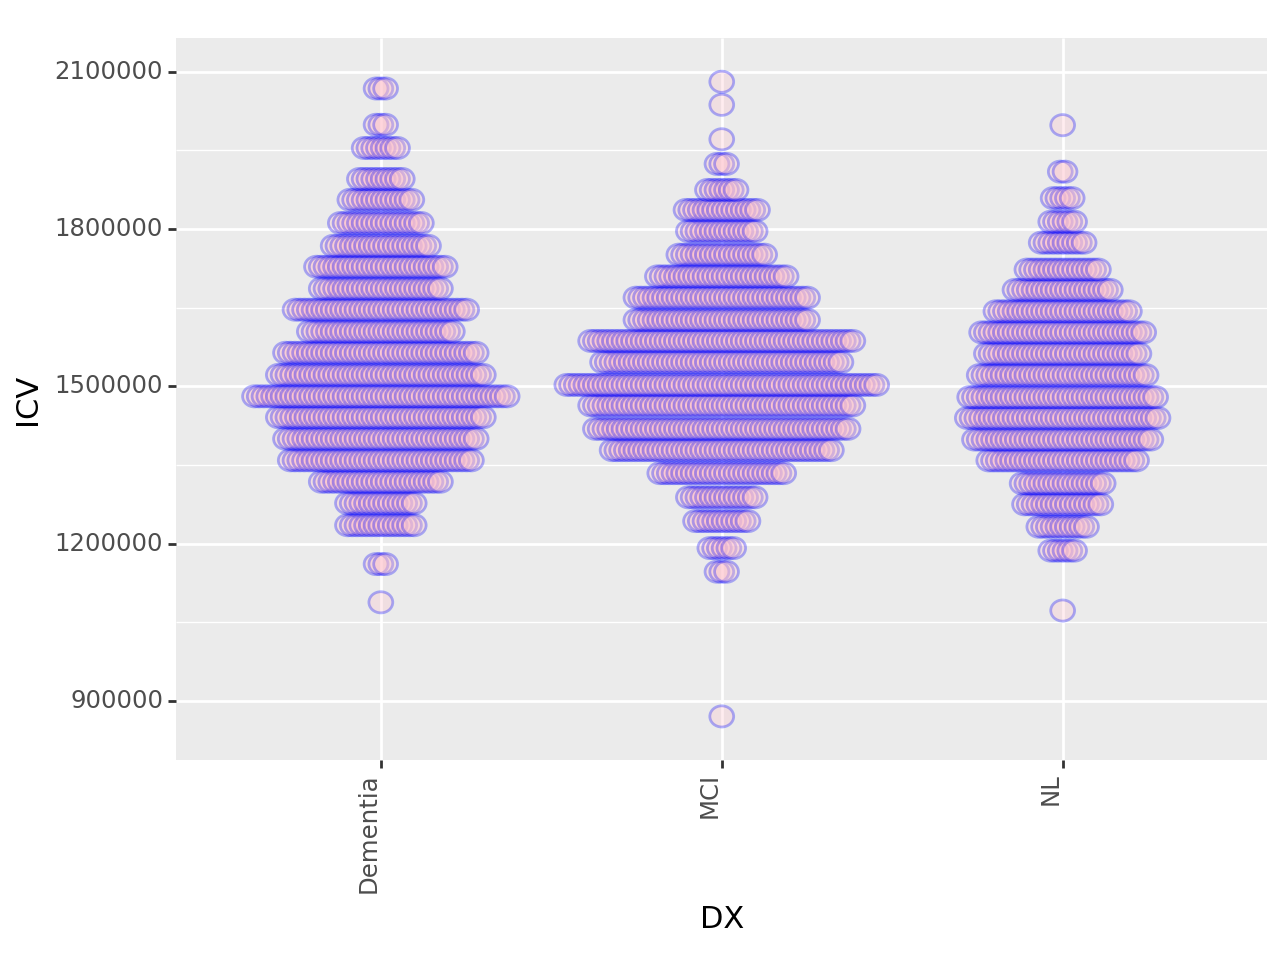

<Figure Size: (640 x 480)>

In [20]:
# Creating Dot plot for only the main diagnosis
(ggplot(data=PD2) +
 aes(x='DX', y='ICV') +
 geom_dotplot(binaxis = 'y',
              stackdir = 'center',
              alpha = 0.3,
              stackratio = 0.2,
              fill="pink",
              color = "blue",
              bins = 30) +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

# Three variables
One of the first things that happens in Alzheimer’s patients is that plaques destroy the hippocampus. Therefore lets look at the size of the hippocampus for the three main diagnosis categories by age.

What you can see here is that an AD patient at age 60 has (on average) the hippocampus size of a cognitive normal person at age 90.

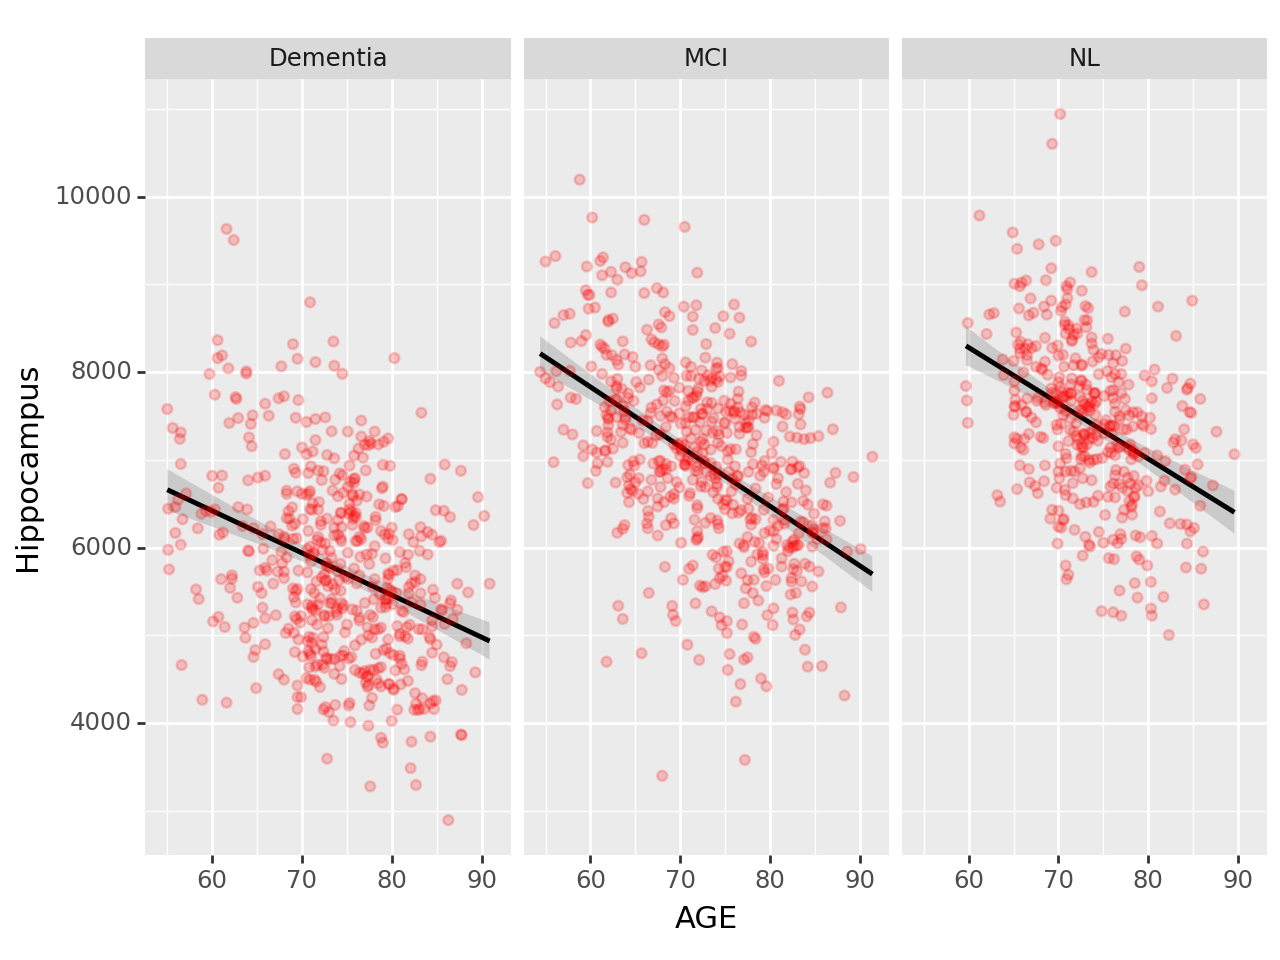

<Figure Size: (640 x 480)>

In [21]:
# Plotting 3 separate scatterplots
(ggplot(data=PD2) +
 aes(x='AGE', y='Hippocampus') +
 geom_smooth(method = 'lm')+
 geom_point(alpha = 0.2, color="red") +
 facet_grid('. ~ DX')
 )

We can also include all three diagnosis categories in one plot. This way we truly have three variables in one plot:
1. AGE (X axis)
2. DX (Colors in legend)
3. Hippocampus (Y Axis)



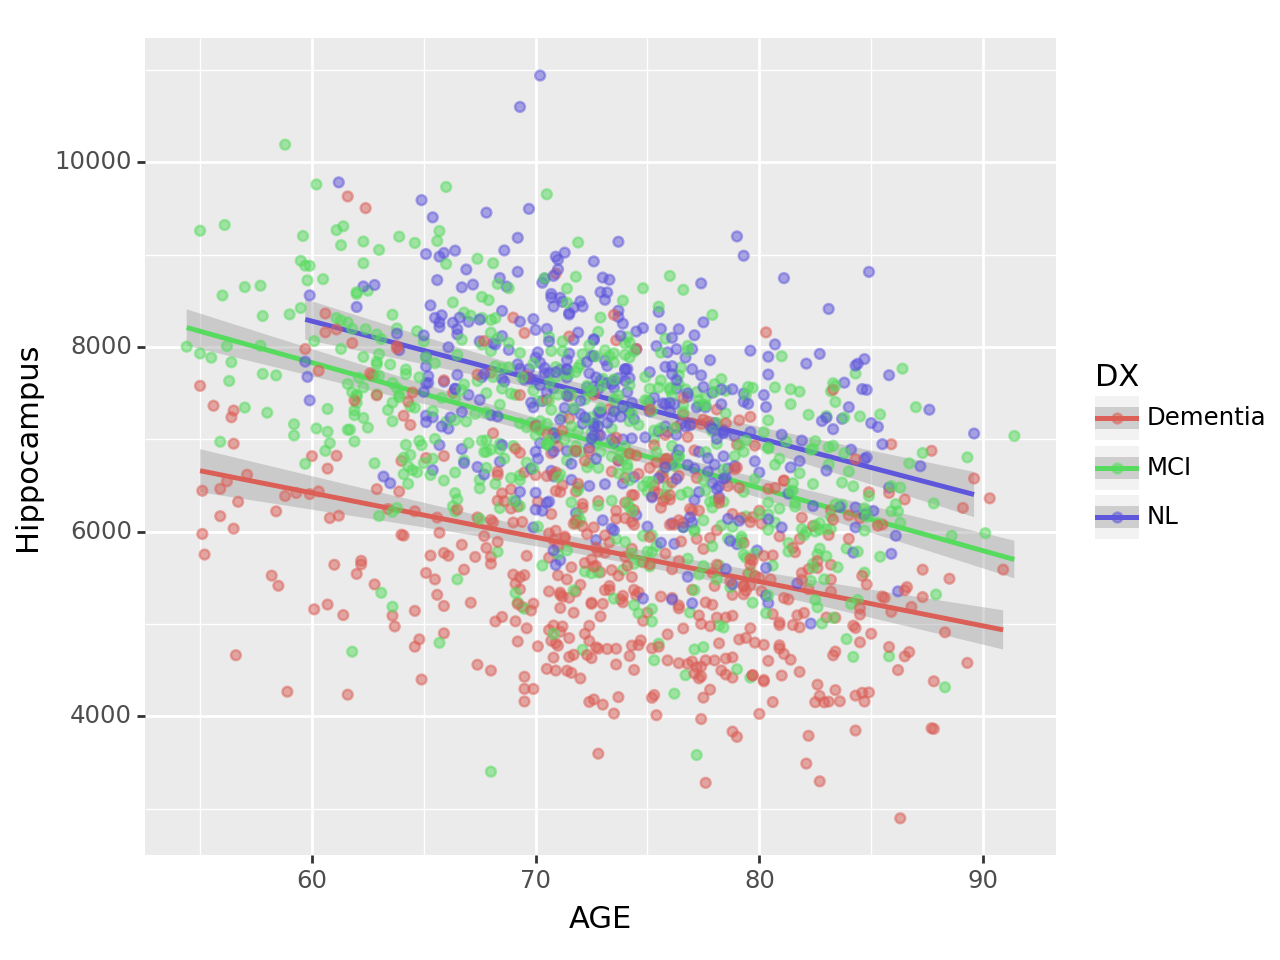

<Figure Size: (640 x 480)>

In [22]:
# Plotting all three scatterplots in the same figure
(ggplot(data=PD2) +
 aes(x='AGE', y='Hippocampus', color='DX') +
 geom_smooth(method = "lm") +
 geom_point(alpha = 0.5)
 )

## Task 4: Comparing analyses

Which option do you think is better? Having 3 plots next to each other or one plot with three lines?

I think having 3 plots overlapping provide a better insight on what is actually happening in the graph and you are able to see what actually is affected and what graphs have correlations.

# Final Task 5: your turn!

Before you start coding, work with your team (or one of your team mates) to come up with a hypothesis that you can test.

Share your hypothesis and one or two plots that support or refute your hypothesis.

As always, let us know if you have any questions!

1. Have a look at the effect of APOE4. Make one-variable, two-variable and three-variable plots including APOE4.

The variable in the dataset records the number of APOE4 alleles someone has (0, 1, or 2).

https://www.nia.nih.gov/health/alzheimers-disease-genetics-fact-sheet

APOE ε4 increases risk for Alzheimer's disease and is also associated with an earlier age of disease onset. Having one or two APOE ε4 alleles increases the risk of developing Alzheimer's. About 25 percent of people carry one copy of APOE ɛ4, and 2 to 3 percent carry two copies.

2. Analyse the effect of education. Make one-variable, two-variable and three-variable plots including education.

**Tip:** you can use the cut() function to make educational level into a categorical variable.




APOE4
0 is neutral

1 is slight risk

2 is higher risk

In [23]:
print(PD2['APOE4'].unique())

[1. 0. 2.]


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 12 rows containing non-finite values.


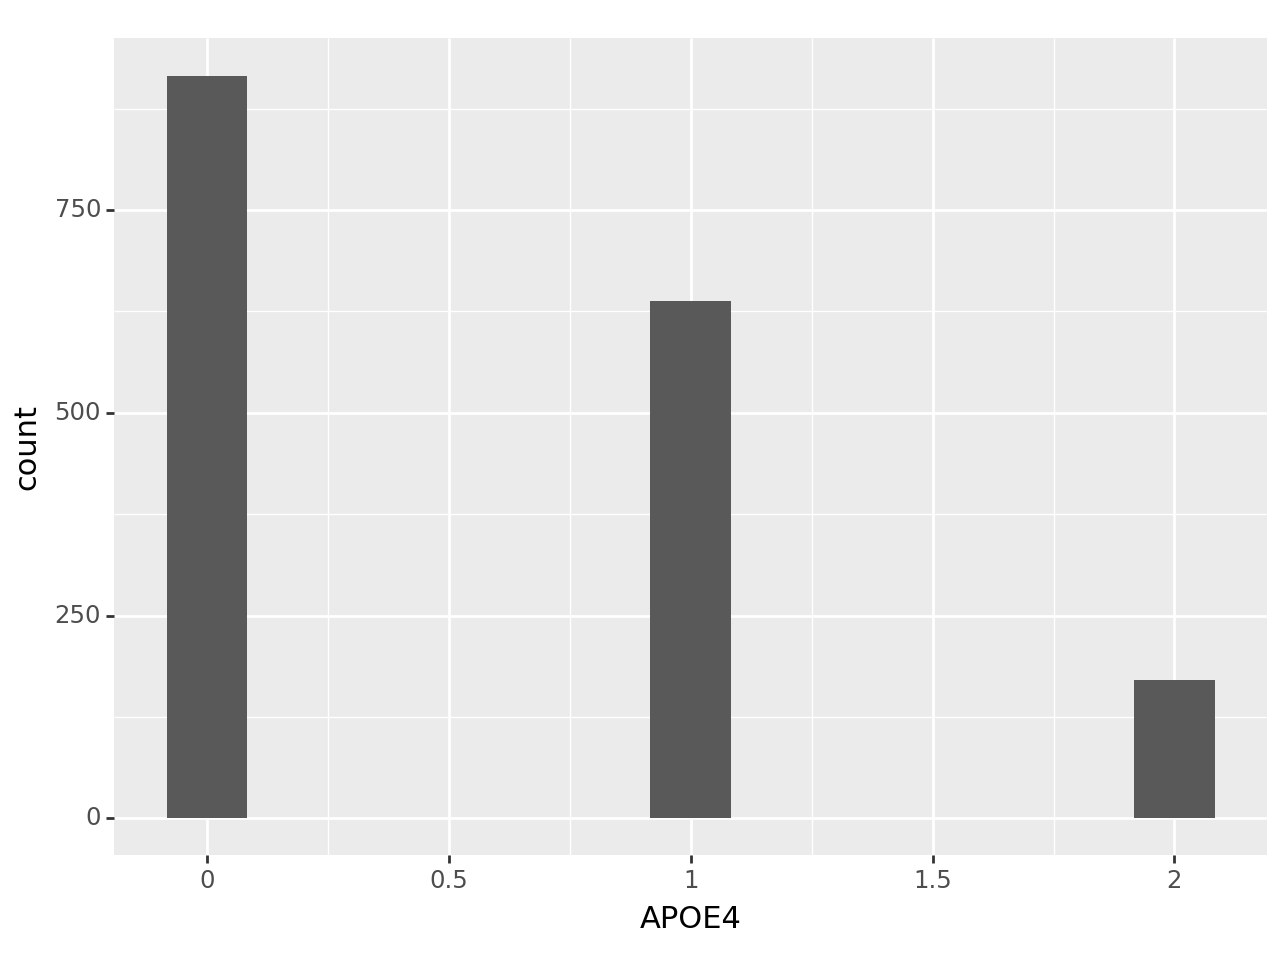

<Figure Size: (640 x 480)>

In [24]:
# displaying a density plot or area plot
(ggplot(data=Pat_data) +
 aes(x='APOE4') +
 geom_bar(stat='bin')
 )

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 12 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:164: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:169: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:164: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_density.py:169: PlotnineWarning: Groups with fewer than 2 data points have been removed.


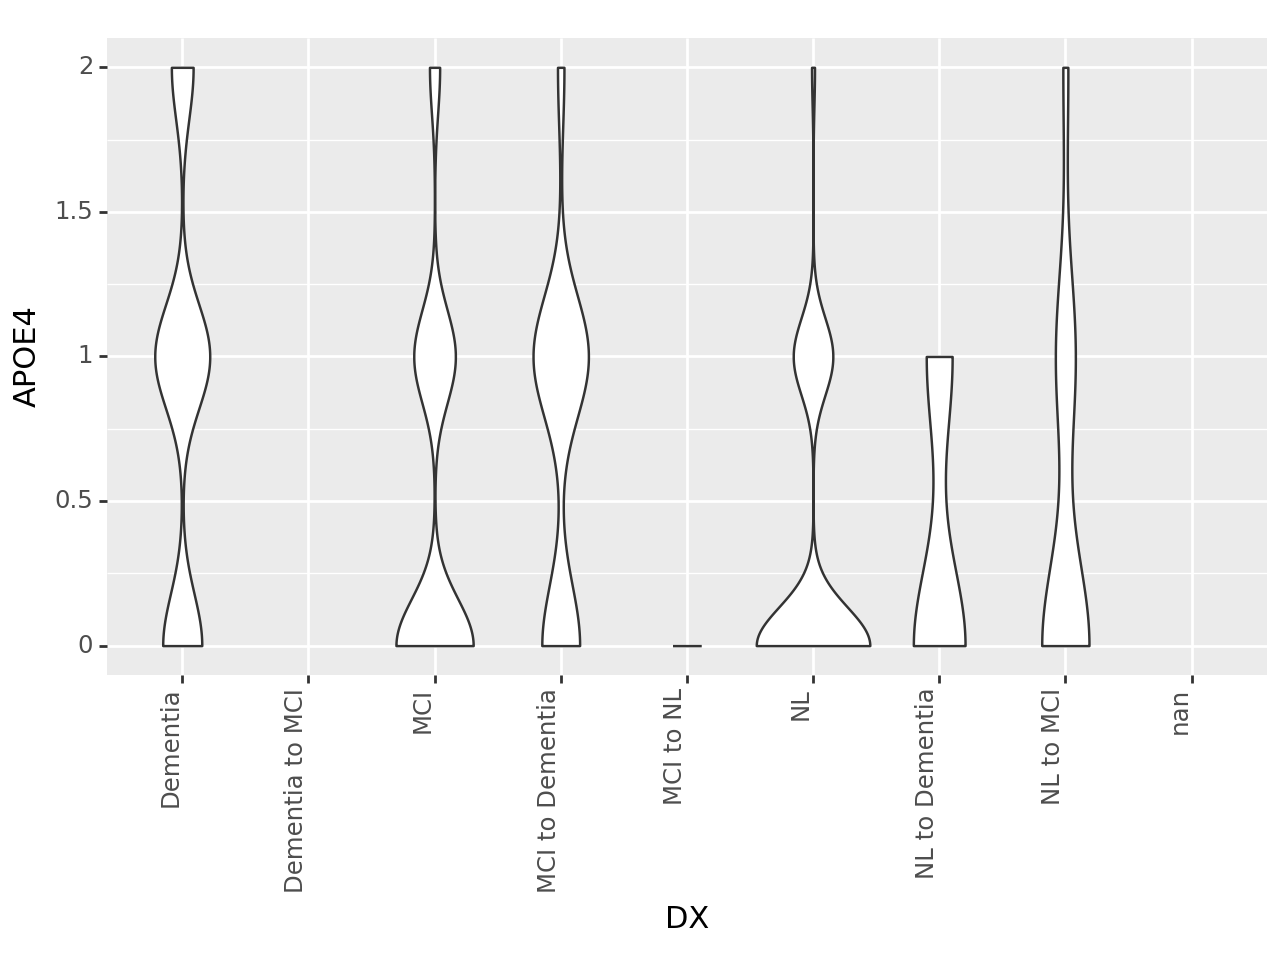

<Figure Size: (640 x 480)>

In [30]:
# Creating violin plots for ICV and Diagnosis
(ggplot(data=Pat_data) +
 aes(x='DX', y='APOE4') +
 geom_violin() +
 theme(axis_text_x=element_text(rotation=90, hjust=1))
 )

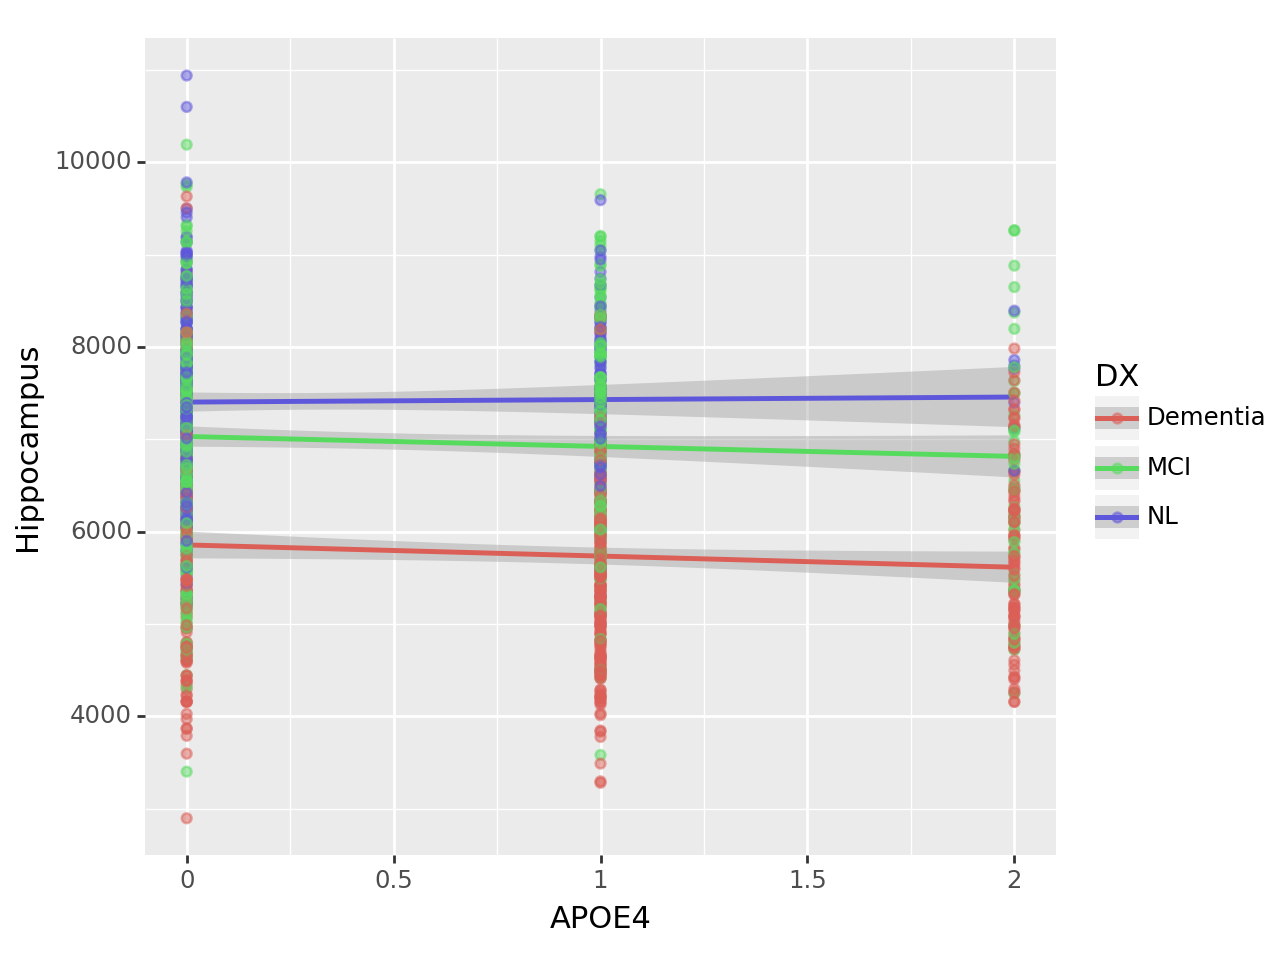

<Figure Size: (640 x 480)>

In [25]:
# Plotting all three scatterplots in the same figure
(ggplot(data=PD2) +
 aes(x='APOE4', y='Hippocampus', color='DX') +
 geom_smooth(method = "lm") +
 geom_point(alpha = 0.5)
 )

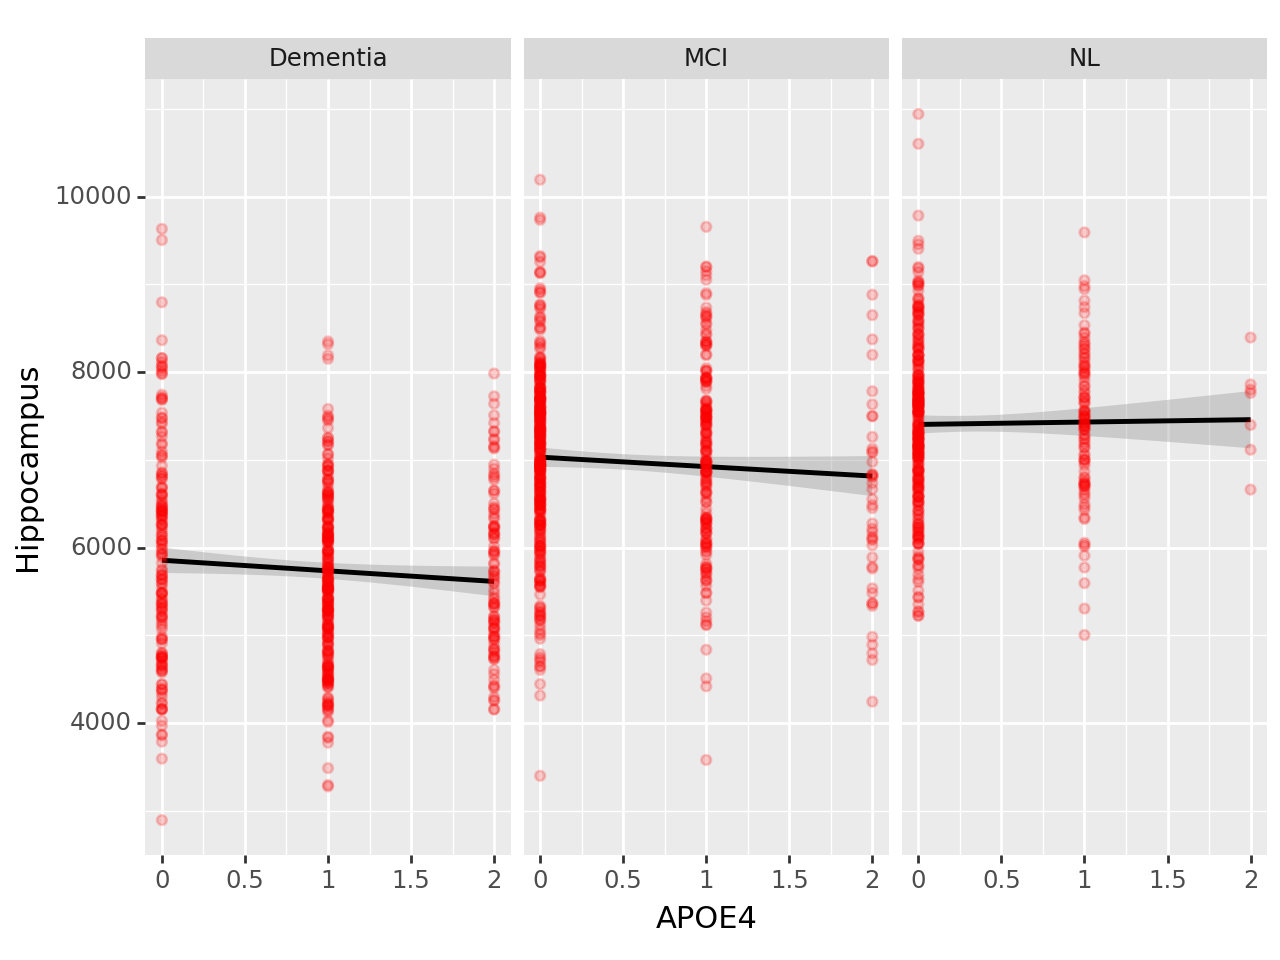

<Figure Size: (640 x 480)>

In [29]:
# Plotting 3 separate scatterplots
(ggplot(data=PD2) +
 aes(x='APOE4', y='Hippocampus') +
 geom_smooth(method = 'lm')+
 geom_point(alpha = 0.2, color="red") +
 facet_grid('. ~ DX')
 )

In [26]:
# take a look at this numerical variable
print(PD2['PTEDUCAT'].unique())

[18 16 12 20 14 13 17 15 19 11  8  9 10  7  4  6]


Below in the bins argument of our function: We are going to stablish that from 0 to 12 (Less than high school), 12 to 16 (At Least highschool) and 16 to 20 (At least 4-year college). This will also mantain its ordinal nature as you can see in the final code chunk.

In [27]:
# Example of using the Cut function to convert a numerical variable into  a categorical one
PD2.loc[:,'PTEDUCAT'] = pd.cut(PD2.loc[:,'PTEDUCAT'],
                         bins= [0,12,16,20],
                         labels=["Less than highschool",'At least highschool', 'At least 4-year college'])


<ipython-input-27-9f868a271d40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
# Printing Categorical variable labels created
print(PD2['PTEDUCAT'].unique())

['At least 4-year college', 'At least highschool', 'Less than highschool']
Categories (3, object): ['Less than highschool' < 'At least highschool' < 'At least 4-year college']
